In [3]:
import matplotlib.pyplot as plt
import astropy
import numpy as np
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget, Observer
from astroplan.plots import plot_airmass
from astroplan.plots import plot_sky
%matplotlib notebook

Let's get the list of observatories in astropy first

In [4]:
observatories=astropy.coordinates.EarthLocation.get_site_names()

In [5]:
observatories

['',
 '',
 '',
 'ALMA',
 'ATST',
 'Anglo-Australian Observatory',
 'Apache Point',
 'Apache Point Observatory',
 'Atacama Large Millimeter Array',
 'BAO',
 'BBSO',
 'Beijing XingLong Observatory',
 'Black Moshannon Observatory',
 'CHARA',
 'CHIME',
 'Canada-France-Hawaii Telescope',
 'Catalina Observatory',
 'Cerro Pachon',
 'Cerro Paranal',
 'Cerro Tololo',
 'Cerro Tololo Interamerican Observatory',
 'Cima Ekar Observing Station',
 'DCT',
 'DKIST',
 'DRAO',
 'DRAO 26m Telescope',
 'Discovery Channel Telescope',
 'Dominion Astrophysical Observatory',
 'Dominion Radio Astrophysical Observatory',
 'G1',
 'GBT',
 'GEO',
 'GEO_600',
 'Gemini South',
 'Green Bank Telescope',
 'H1',
 'Hale Telescope',
 'Haleakala Observatories',
 'Happy Jack',
 'IAO',
 'JCMT',
 'James Clerk Maxwell Telescope',
 'Jansky Very Large Array',
 'John Galt Telescope',
 'K1',
 'KAGRA',
 'Keck Observatory',
 'Kitt Peak',
 'Kitt Peak National Observatory',
 'L1',
 'LHO',
 'LHO_4k',
 'LLO',
 'LLO_4k',
 'La Silla Observ

Let's get the twilight, sunset, and sunrise times for the first day in the observing run

In [6]:

time = Time('2022-03-11 13:00:00')
obs = Observer.at_site('Roque de Los Muchachos')

# Compute equivalent time with astroplan
sunset = obs.sun_set_time(time,horizon=0*u.deg, which='next')
twilight_6_deg=obs.twilight_evening_civil(time,which='next')
twilight_12_deg=obs.twilight_evening_nautical(time,which='next')
twilight_18_deg=obs.twilight_evening_astronomical(time,which='next')
sunrise = obs.sun_rise_time(time,horizon=0*u.deg, which='next')
sunrise_twilight_6_deg=obs.twilight_morning_civil(time,which='next')
sunrise_twilight_12_deg=obs.twilight_morning_nautical(time,which='next')
sunrise_twilight_18_deg=obs.twilight_morning_astronomical(time,which='next')

print('sunset')
print('----------')
print('00 deg', sunset.iso)
print('06 deg', twilight_6_deg.iso)
print('12 deg', twilight_12_deg.iso)
print('18 deg', twilight_18_deg.iso)
print('\n')
print('sunrise')
print('----------')
print('18 deg', sunrise_twilight_18_deg.iso)
print('12 deg', sunrise_twilight_12_deg.iso)
print('06 deg', sunrise_twilight_6_deg.iso)
print('00 deg', sunrise.iso)

sunset
----------
00 deg 2022-03-11 19:13:45.185
06 deg 2022-03-11 19:41:10.147
12 deg 2022-03-11 20:08:33.987
18 deg 2022-03-11 20:36:02.306


sunrise
----------
18 deg 2022-03-12 06:06:21.969
12 deg 2022-03-12 06:33:48.781
06 deg 2022-03-12 07:01:10.697
00 deg 2022-03-12 07:28:33.442


Now let's look at on the first night where the target and the moon are with an airmass plot

<IPython.core.display.Javascript object>


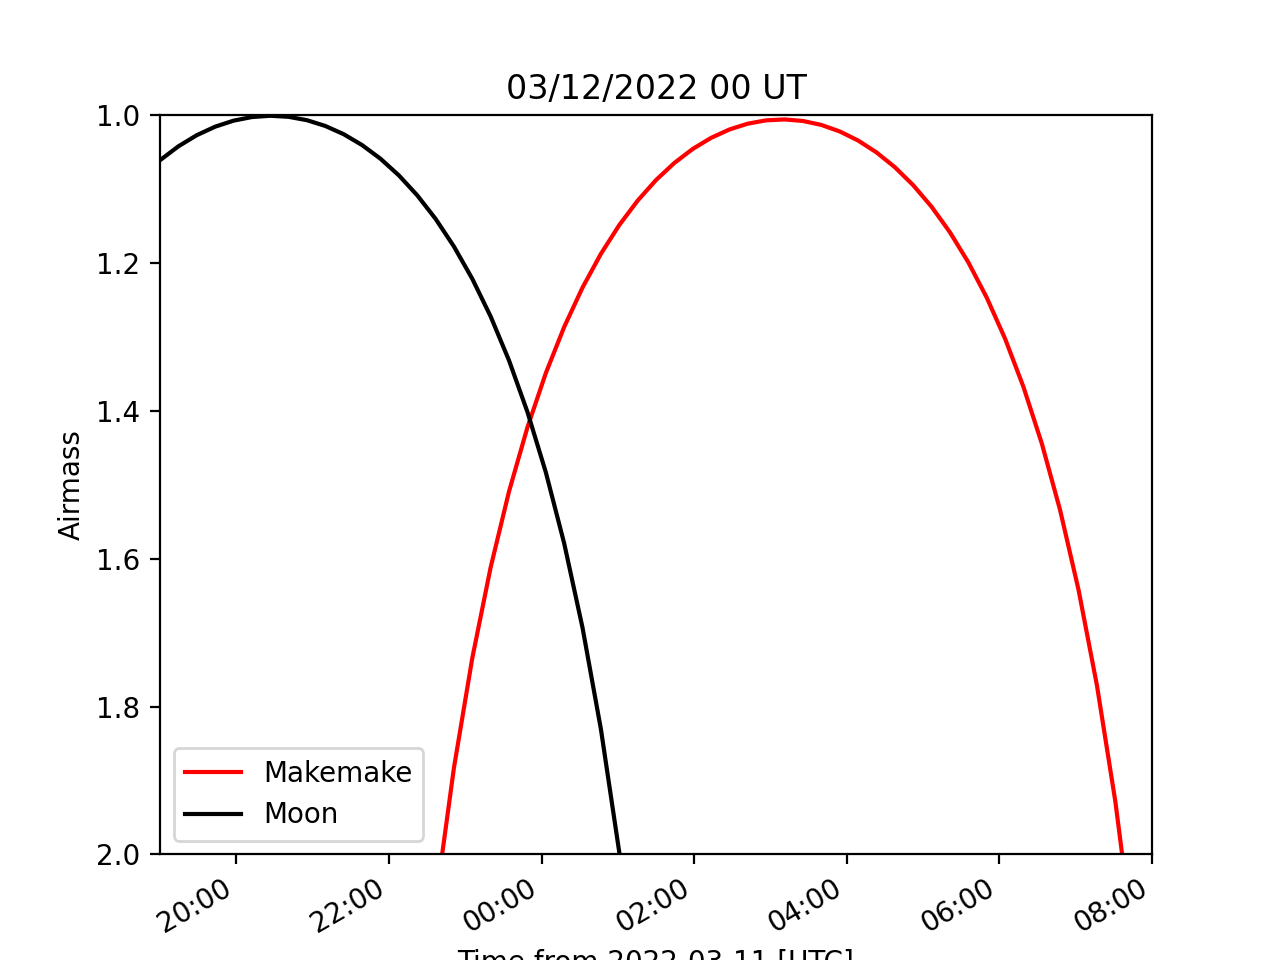

/Users/mschwamb/opt/anaconda3/lib/python3.8/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/mschwamb/opt/anaconda3/lib/python3.8/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


In [7]:
fig=plt.figure()

time = Time('2022-03-12 00:00')
observe_time = time + np.linspace(-5, 8, 55)*u.hour
#target = FixedTarget.from_name('HD 189733')

makemake=SkyCoord('13 15 36.05 +22 46 18.7', unit=(u.hourangle, u.deg))
target = FixedTarget(coord=makemake, name="Makemake")
makemake_styles = {'color': 'r'}

luna=SkyCoord('06 32 24.79 +26 31 00.1', unit=(u.hourangle, u.deg))
Moon = FixedTarget(coord=luna, name="Moon")
Moon_styles = {'color': 'black'}

obs = Observer.at_site('Roque de Los Muchachos')

plot_airmass(target, obs, observe_time,style_kwargs=makemake_styles,max_airmass=2)
plot_airmass(Moon, obs, observe_time,style_kwargs=Moon_styles,max_airmass=2)
plt.legend()
plt.title("03/12/2022 00 UT")
plt.show()

Let's just plot the airmass of the target with twilight and evening shading with the elevation plotted on the right

<IPython.core.display.Javascript object>


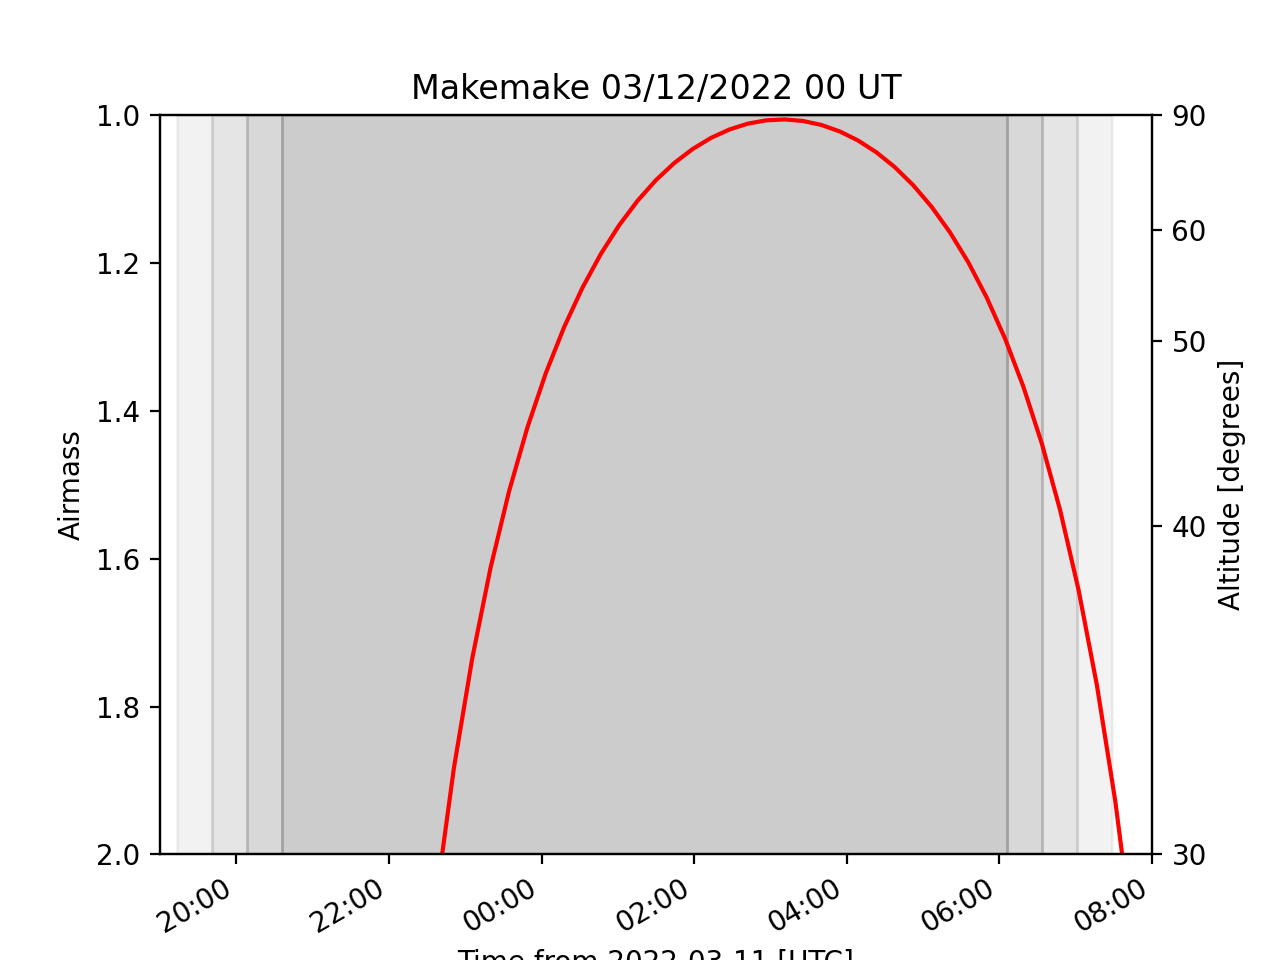

/Users/mschwamb/opt/anaconda3/lib/python3.8/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


In [8]:
fig=plt.figure()

time = Time('2022-03-12 00:00')
observe_time = time + np.linspace(-5, 8, 55)*u.hour
#target = FixedTarget.from_name('HD 189733')

makemake=SkyCoord('13 15 36.05 +22 46 18.7', unit=(u.hourangle, u.deg))
target = FixedTarget(coord=makemake, name="Makemake")
makemake_styles = {'color': 'r'}

luna=SkyCoord('06 32 24.79 +26 31 00.1', unit=(u.hourangle, u.deg))
Moon = FixedTarget(coord=luna, name="Moon")
Moon_styles = {'color': 'black'}

obs = Observer.at_site('Roque de Los Muchachos')
plot_airmass(target, obs, observe_time, brightness_shading=True, altitude_yaxis=True, max_airmass=2, style_kwargs=makemake_styles)
plt.title("Makemake 03/12/2022 00 UT")
plt.show()

What is the azimuth and altitude of our target across the night?

<IPython.core.display.Javascript object>


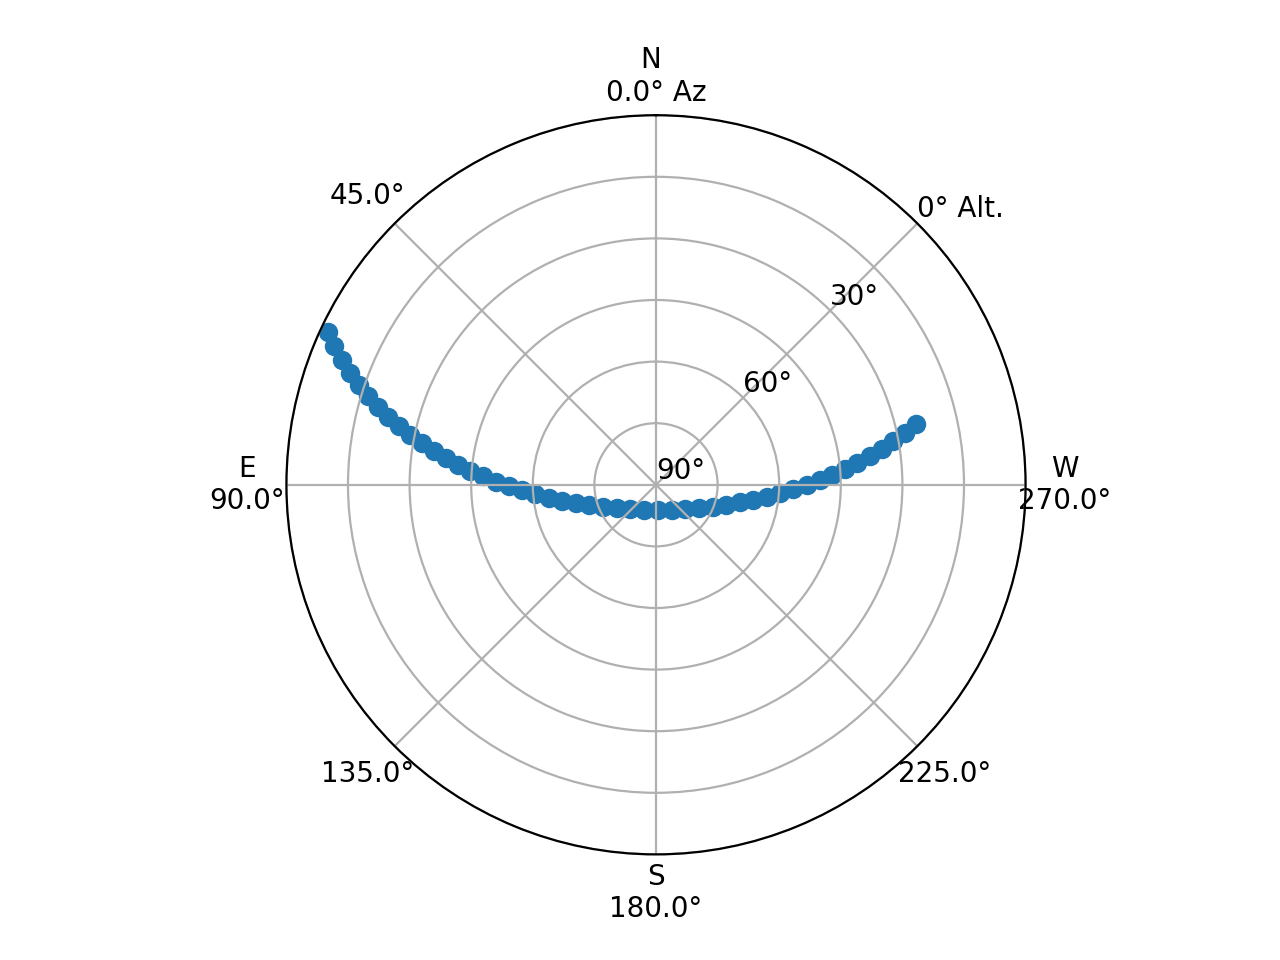

<PolarAxesSubplot:>

In [9]:
fig=plt.figure()
plot_sky(target, obs, observe_time)

where are the targets in azimuth and elevation of the target at this given time?

<IPython.core.display.Javascript object>


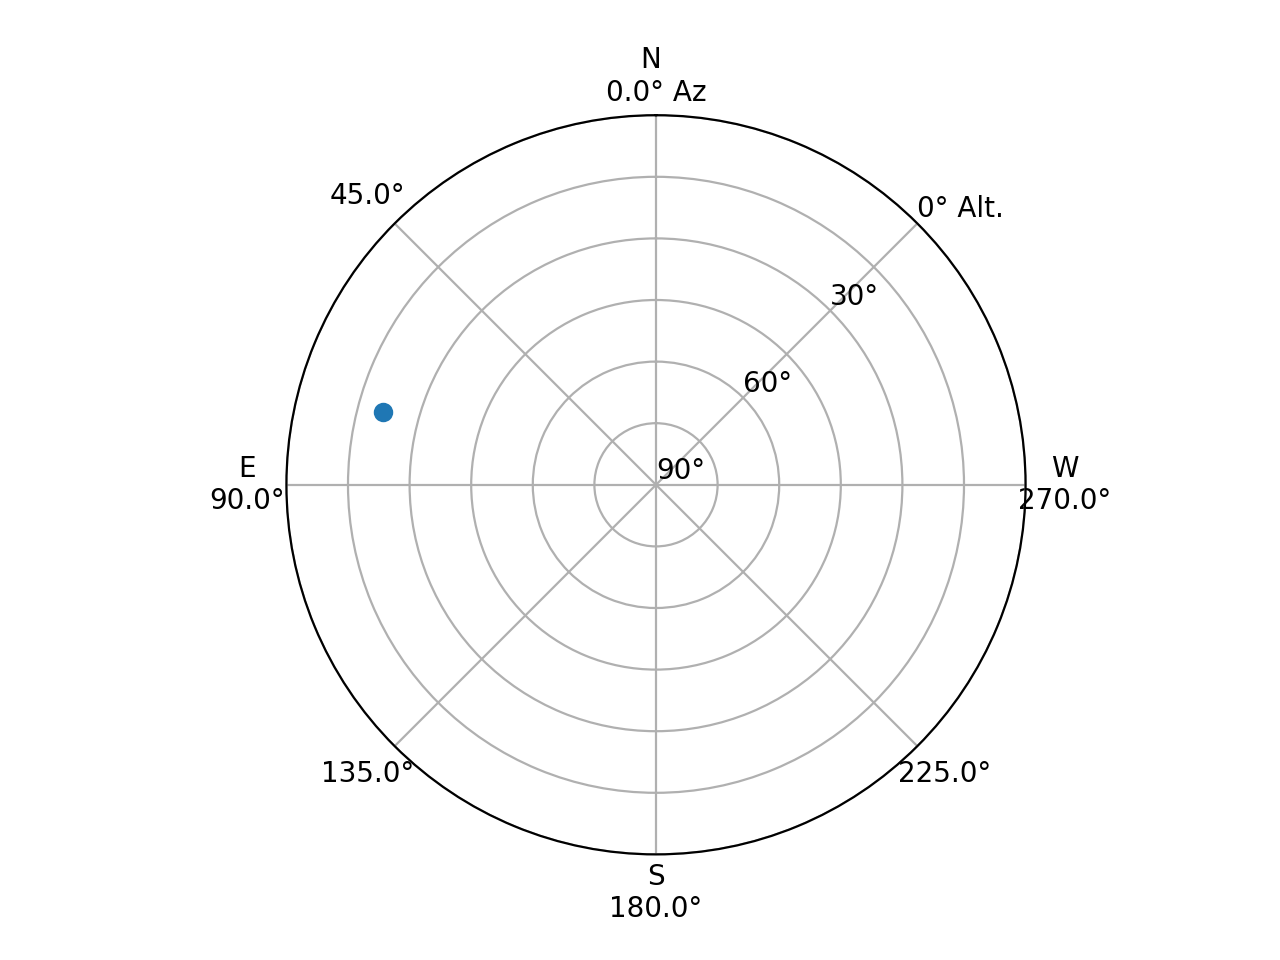

<PolarAxesSubplot:>

In [10]:
time = Time('2022-03-11 22:00')
fig=plt.figure()
plot_sky(target, obs, time)

How far will the target move from the start of the run to the end?

In [11]:

start_of_run=SkyCoord('13 15 38.92 +22 45 51.7', unit=(u.hourangle, u.deg))
end_of_run=SkyCoord('13 15 24.39 +22 48 02.6', unit=(u.hourangle, u.deg))
sep = start_of_run.separation(end_of_run)
sep.arcminute

3.9970135300461926

Let's take a look at the PanSTARRS cutouts and see if we have to worry about our object going near bright stars or crossing over stars

https://ps1images.stsci.edu/cgi-bin/ps1cutouts
